# Import Required Libraries

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import Datasets

In [234]:
data = pd.read_csv("data.csv")
housing = pd.read_csv("housing.csv")

## Dataset Info

In [235]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [236]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [237]:
print(data.info(),"\n\n")
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      2161

# Linear Regression on Data 

In [238]:
X = data[['YearsExperience']]
y = data['Salary']

- x is a DataFrame with column names
- It returns a 2D Dataframe
- It is required by Scikit-learn models, which expect the features in a 2D shape

- y is a 1D array, which is appropriate for a target/label variable

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [240]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [241]:
y_pred = model.predict(X_test)
line = model.predict(X)

In [242]:
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(mse)
print(r2)

4934969.878489006
0.993422386435995


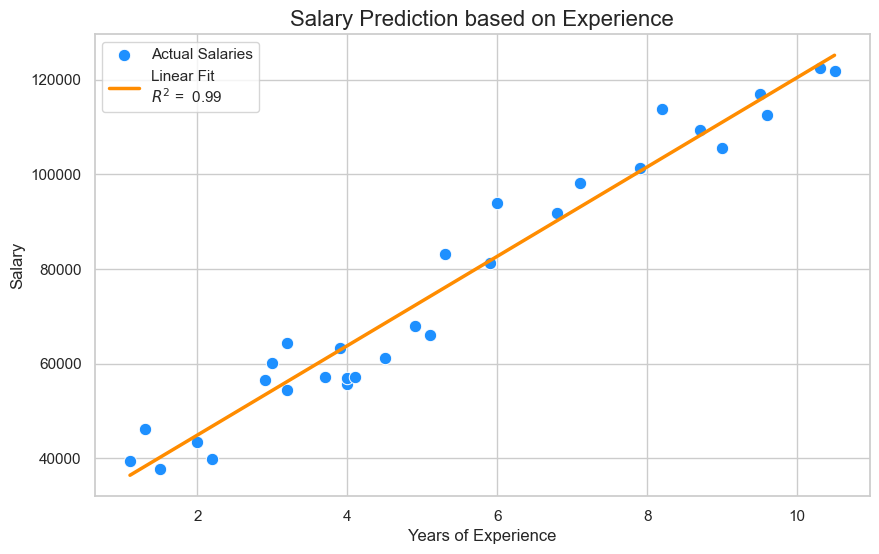

In [243]:
sns.set(style='whitegrid', palette="muted")
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=data,s=80, color='dodgerblue', label="Actual Salaries")
plt.plot(X, line, color='darkorange', linewidth=2.5, label = f"Linear Fit\n$R^2$ = {r2: .2f}")
plt.title("Salary Prediction based on Experience", fontsize=16)
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.legend()
plt.show()

**Overview:**

This project uses a simple linear regression model to predict an employee’s salary based on their years of experience. The dataset includes 30 entries, with salaries ranging from **₹40,000 to ₹1,20,000** and experience levels from 2 to 10 years.

**Key Observations:**

* There’s a clear **positive linear relationship** — as years of experience increase, salary increases steadily.
* The regression line on the plot shows this trend clearly, running smoothly from lower to higher values.
* The **R² score on the full dataset was 0.99**, indicating the model fits the data almost perfectly.
* On the test data, the **R² dropped slightly to around 0.71**, showing good but not perfect generalization.
* The **Mean Squared Error (MSE)** was \~₹39.7 billion. While large, this is expected because of the scale of salary values.

# EDA on Data Dataset

## Information about the dataset

In [244]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


## Missing value check

In [245]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Summary 

In [246]:
print(data.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


## Correlation Matrix

In [247]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Graphs and Plots

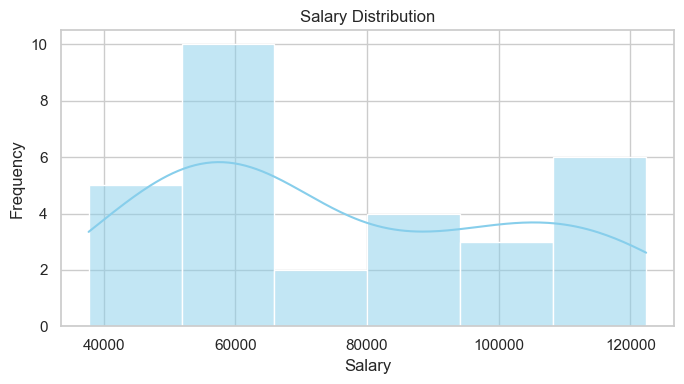

In [248]:
# Distribution Plot - Salary
plt.figure(figsize=(7, 4))
sns.histplot(data['Salary'], kde=True, color='skyblue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The graph is mostly righ skewed mostly the people earn between 40,000 - 80,000 with a few high earners pushing the curve

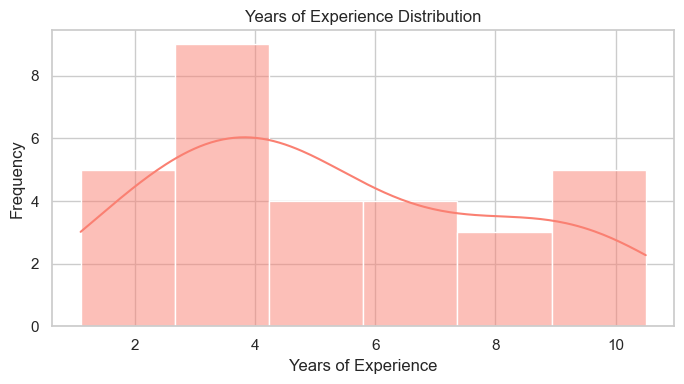

In [249]:
# Distribution Plot - Years of Experience
plt.figure(figsize=(7, 4))
sns.histplot(data['YearsExperience'], kde=True, color='salmon')
plt.title("Years of Experience Distribution")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Mostly Employees have 3-8 years of experience showing a mid-level experienced people

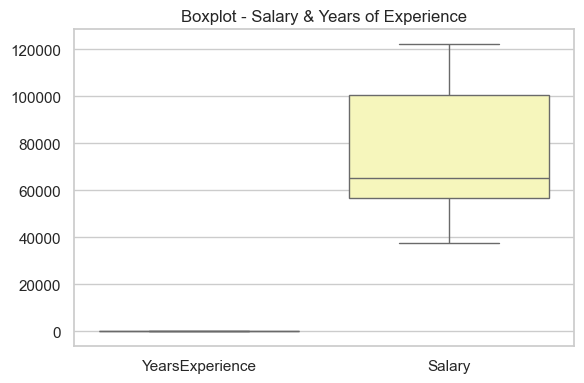

In [250]:
# Boxplots to detect outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, orient='v', palette="Set3")
plt.title("Boxplot - Salary & Years of Experience")
plt.tight_layout()
plt.show()

A few salary variance is seen 

# Linear Regression on Housing

In [251]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [252]:
#Drop unneccessary Columns
housing.drop(['id','date'], axis=1, inplace=True)

In [253]:
X = housing.drop('price', axis=1)
y = housing['price']

In [254]:
#Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [255]:
house_model = LinearRegression()
house_model.fit(X_train, y_train)

LinearRegression()

In [256]:
y_pred= house_model.predict(X_test)

In [257]:
mse_house = mean_squared_error(y_test, y_pred)
r2_house = r2_score(y_test,y_pred)
print(mse_house)
print(r2_house)

39701669988.924904
0.7089991630088457


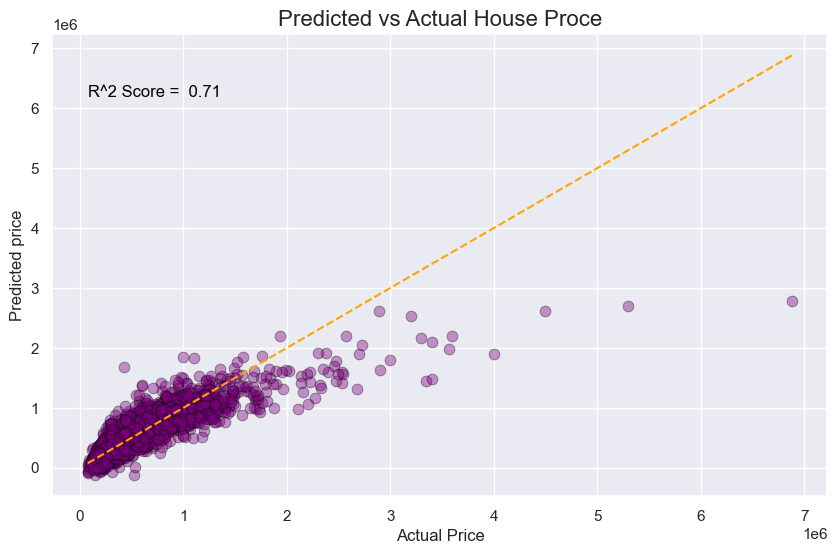

In [258]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='purple', edgecolor='black', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='orange')
plt.title("Predicted vs Actual House Proce", fontsize=16)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted price", fontsize=12)
plt.text(y_test.min(),y_test.max()*0.9, f'R^2 Score =  {r2_house:.2f}', fontsize=12, color='black')
plt.show()

**Overview:**

This project involves predicting house prices using multiple features (like square footage, number of bedrooms/bathrooms, location, and condition) from a large dataset of over 21,000 homes.

**Key Observations:**

* The model achieved an **R² score of 0.71**, which means it was able to explain about 71% of the variation in house prices — a solid performance for a real-world dataset.
* The MSE was also around ₹39.7 billion, again high due to the scale of housing prices, but consistent.
* In the graph comparing predicted vs. actual prices:

  * A dense cluster of purple dots appears around lower price ranges (between ₹0–₹2 million), which shows that the dataset has more mid-range homes.
  * The predictions get more scattered for expensive houses, meaning the model struggles a bit with luxury or high-end properties.
  * The dotted orange line represents perfect predictions. Most dots are fairly close to this line, especially in the average range.

# EDA on Housing Dataset 

## Basic Information

In [259]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

## Missing Value

In [260]:
housing.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Description 

In [261]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


## Correlation Table

In [278]:
housing.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


## Graphs and Plots

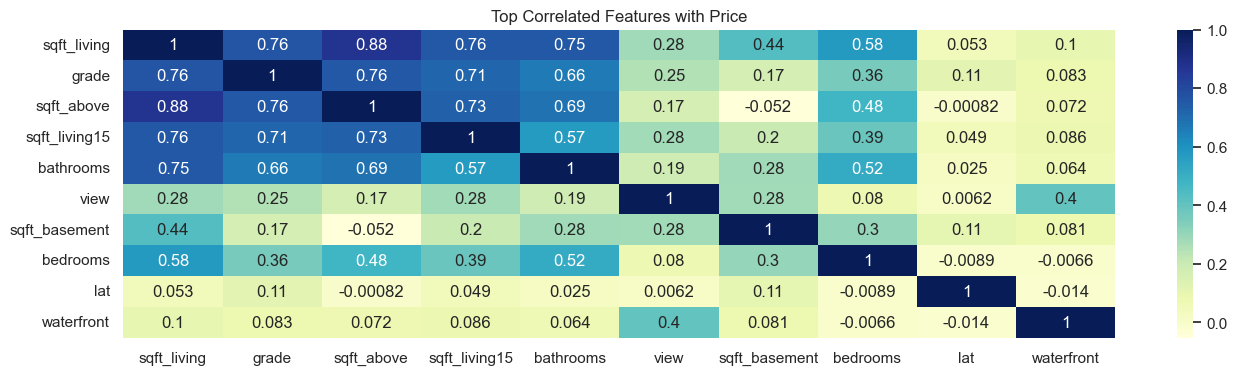

In [275]:
# Step 7: Correlation heatmap (Top correlated features with price)
plt.figure(figsize=(16, 4))
corr_matrix = housing.corr()
top_corr = corr_matrix["price"].sort_values(ascending=False)[1:11]
sns.heatmap(housing[top_corr.index].corr(), annot=True, cmap="YlGnBu")
plt.title("Top Correlated Features with Price")
plt.show()

| Feature         | Correlation with Price |
|-----------------|------------------------|
| sqft_living     | 0.70 (very strong)     |
| grade           | 0.67                   |
| sqft_above      | 0.61                   |
| sqft_living15   | 0.59                   |
| bathrooms       | 0.53                   |
| view            | 0.40                   |
| waterfront      | 0.27                   |
| lat             | 0.31                   |


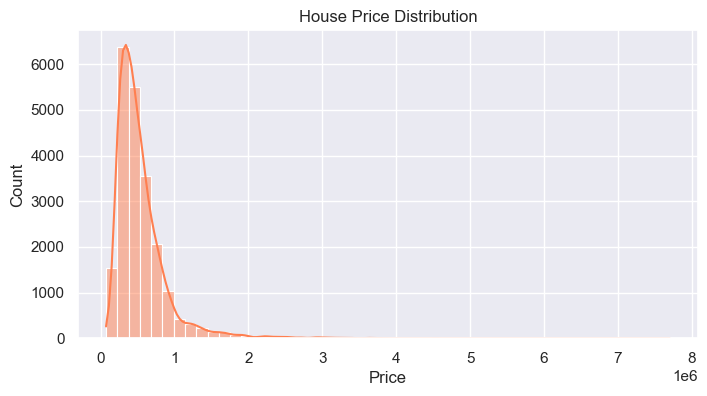

In [276]:
# Step 8: Price distribution
plt.figure(figsize=(8, 4))
sns.histplot(housing['price'], bins=50, kde=True, color="coral")
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

- Completely Right Skewed
- Most of the houses are priced on the lower end below 1,00,000
- It has outliers and non-normal Distribution

C:\Users\Sahil Karande\AppData\Local\Temp\ipykernel_12872\3896002771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=housing, palette="coolwarm")


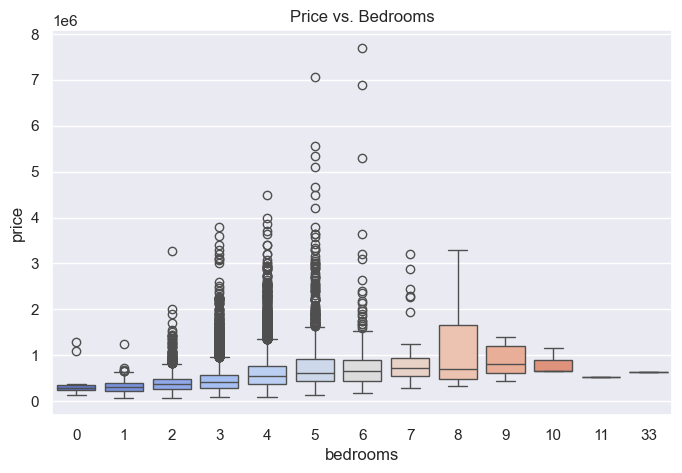

In [281]:
# Step 9: Boxplot - Price vs Bedrooms
plt.figure(figsize=(8, 5))
sns.boxplot(x='bedrooms', y='price', data=housing, palette="coolwarm")
plt.title("Price vs. Bedrooms")
plt.show()


In [282]:
bedroom_price_summary = housing.groupby('bedrooms')['price'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
bedroom_price_summary = bedroom_price_summary.sort_values(by='bedrooms')
print(bedroom_price_summary)

    bedrooms  count          mean    median     min      max
0          0     13  4.095037e+05  288000.0  139950  1295648
1          1    199  3.176429e+05  299000.0   75000  1247000
2          2   2760  4.013727e+05  374000.0   78000  3278000
3          3   9824  4.662321e+05  413000.0   82000  3800000
4          4   6882  6.354195e+05  549997.5  100000  4489000
5          5   1601  7.865998e+05  620000.0  133000  7062500
6          6    272  8.255206e+05  650000.0  175000  7700000
7          7     38  9.511847e+05  728580.0  280000  3200000
8          8     13  1.105077e+06  700000.0  340000  3300000
9          9      6  8.939998e+05  817000.0  450000  1400000
10        10      3  8.193333e+05  660000.0  650000  1148000
11        11      1  5.200000e+05  520000.0  520000   520000
12        33      1  6.400000e+05  640000.0  640000   640000


- Most common: 3-bedroom houses (9,824 entries).
- Prices increase with more bedrooms, peaking around 8–9 bedrooms.
- Extreme outliers: Houses with 33 bedrooms and those with 5+ often show very high max prices.
- Some anomalies: Bedroom count like 33 is likely a data error or extreme outlier.

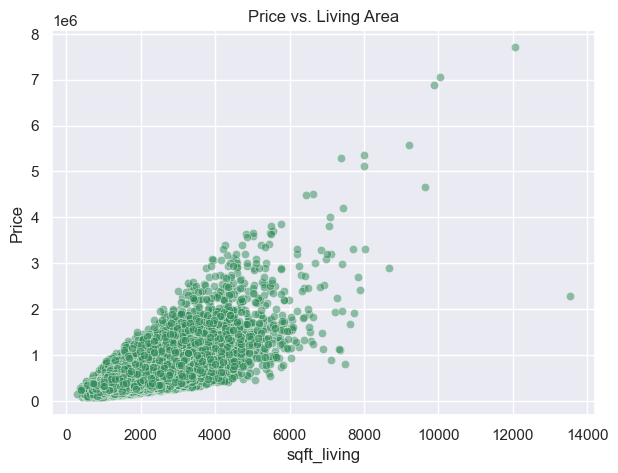

In [283]:
# Step 10: Price vs. Square Foot Living
plt.figure(figsize=(7, 5))
sns.scatterplot(x='sqft_living', y='price', data=housing, alpha=0.5, color='seagreen')
plt.title("Price vs. Living Area")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.show()


- As living space increases, the average and median prices consistently rise.
- There's a sharp price jump beyond 3000 sqft, reflecting premium or luxury markets.
- Most houses fall in the 1000-2000 sqft range — these are mid-range and affordable for many.
- Outliers are present in higher ranges, with prices soaring due to luxury features.

# Question Based on data.csv

## 1) How Many Employees having more than 5 years of experience are earning more than 60000?

In [265]:
filtered = data[(data['YearsExperience'] > 5) & (data['Salary'] > 60000)]
count=filtered.shape[0]
print(count,"employees having more than 5 years of experience are earning more than 60000")

14 employees having more than 5 years of experience are earning more than 60000


## 2) How many Employees are earning between 50000 - 80000?

In [266]:
filtered_between = data[(data['Salary'] >= 50000) & (data['Salary'] <= 80000)]
count = filtered_between.shape[0]
print(count," employees are earning between 50000 - 80000")

12  employees are earning between 50000 - 80000


## 3) The Scatter plot in following image shows the relationship between the "YearsExperience" 
## and "Salary" columns. What possible inferences can be drawn from that?


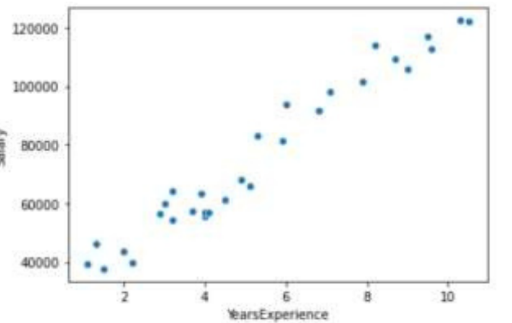

A. The plot shows a positive correlation between the "YearsExperience" and "Salary" columns.

## 4) The Distribution plot of the column "YearsExperience" is shown in the image below, 
## What possible inferences can be drawn from the plot


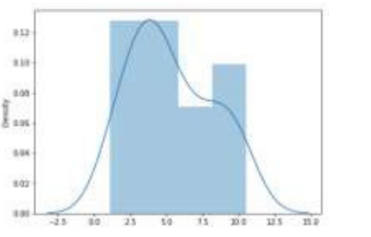

b. "YearsExperience" data is positively Skewed 

## 5) What all inferences can be drawn from the table shown below:

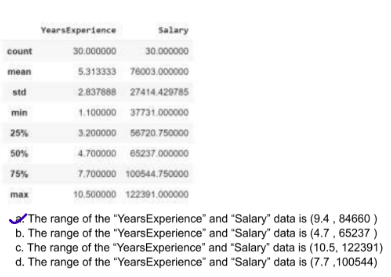

In [267]:
range = 10.50000000 - 1.10000000

In [268]:
range

9.4

## 6) To split the dataset into training and testing data, if we use the following code. 
### X = data['Years Experience'] 
### y = data['Salary'] 
### X_train, X_test, y_train, y_test train_test_split(X, y, test_size=0.2, random_state=0)

What does it mean when we write the test size as 0.2?

Answer: d. The training data will consist of 80% of the samples from the total population.

## 7) If we change random_state to 42, what does it mean for our training and testing data?

Answer: c. The random state does not have any effect on the shape of the data.

## 8) If the R² score was 0.98 with an 80:20 split, and we change the split to 60:40 and retrain, what will the new R² score be?

Answer: B.0.96

## 9)  If while fitting the model with training and testing data, you get the following error ValueError: Expected 2D array, got. ID array instead: What could be the issue with the data, and how can you solve it?

Answer: a. Reshape the data to a two dimensional array

# Question Based on housing.csv.

## 10) How many houses have a waterfront?

In [269]:
counts = housing['waterfront'].value_counts()
print(counts[1], 'houses have a waterfront')
print("c.163")

163 houses have a waterfront
c.163


## 11) How many houses have 2 floors?

In [270]:
house_count = housing['floors'].value_counts()
print(house_count[2], "houses have 2 floors")
print("b. 8241")

8241 houses have 2 floors
b. 8241


## 12) How many houses built before 1960 have a waterfront?

In [271]:
before = housing[(housing['yr_built'] < 1960) & (housing['waterfront'] == 1)]
count = before.shape[0]
print(count,"houses built before 1960 have a waterfront")
print("a. 80")

80 houses built before 1960 have a waterfront
a. 80


## 13) What is the price of the most expensive house having more than 4 bathrooms?


In [272]:
exp_house = housing[housing['bathrooms'] > 4]
max_price = exp_house['price'].max()
print(max_price, 'is the price of the most expensive house having more than 4 bathrooms')
print("a. 7700000")

7700000 is the price of the most expensive house having more than 4 bathrooms
a. 7700000


## 14) The image shown below shows the boxplot of the price column from the housing dataset. What inferences can you make from the plot?

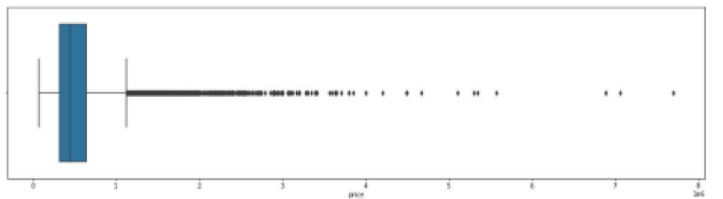

Answer: c. There is a presence of outliers in the price data

## 15)  For instance, if the 'price' column consists of outliers, how can you make the data clean and remove the redundancies?

Answer: a. Calculate the IQR range and drop the values outside the range.

## 16) What are the various parameters that can be used to determine the dependent variables in the housing data to determine the price of the house?


Answer: a. Correlation coefficients

## 17) If we get the r2 score as 0.38, what inferences can we make about the model and its efficiency?

a. The model is 38% accurate and shows poor efficiency.

## 18) If the metrics show that the p-value for the grade column is 0.092, what all inferences can we make about the grade column?

c. insignificance in presence of other variables

## 19)  What does a high Variance Inflation Factor (VIF) indicate about a feature?

Answer: a. High multicollinearity